# Requirements

In [80]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd

# Configuration

In [81]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Simple Usage

In [82]:
# Initialize the webdriver.
browser = webdriver.Chrome(options=options)

In [83]:
# Navigate to a web page.
browser.get('https://www.apple.com/mk/')

In [84]:
# Print the page source code.
print(browser.page_source)

<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en-MK" lang="en-MK" prefix="og: http://ogp.me/ns#" class="js no-touch progressive-image no-reduced-motion no-edge no-ie css-mask enhanced-xp desktop no-tablet no-windows no-android retina no-safari no-old-safari chrome no-firefox no-iphone no-ipad no-old-macos" data-layout-name="evergreen"><head>
	
































<meta charset="utf-8">
<link rel="canonical" href="https://www.apple.com/mk/">


	
	<link rel="alternate" href="https://www.apple.com/" hreflang="en-US"><link rel="alternate" href="https://www.apple.com/ae-ar/" hreflang="ar-AE"><link rel="alternate" href="https://www.apple.com/ae/" hreflang="en-AE"><link rel="alternate" href="https://www.apple.com/am/" hreflang="en-AM"><link rel="alternate" href="https://www.apple.com/at/" hreflang="de-AT"><link rel="alternate" href="https://www.apple.com/au/" hreflang="en-AU"><link rel="alternate" href="https://www.apple.com/az/" hreflang="en-AZ"><link rel="alternate" href=

In [85]:
# Select an element from the page.
element = browser.find_element(By.CLASS_NAME, 'headline')

In [86]:
# Print the element's innner text.
print(element.text)

iPhone 16 Pro


# Laboratory Exercise - Run Mode (8 points)

In this laboratory assignment, the goal is to perform web scraping on the website https://books.toscrape.com/. Your task includes the extraction of book titles and prices for a minimum of 20 books from this website. Following this data extraction, you will construct a data frame to organize the collected data. Finally, you are expected to generate a histogram to provide a visual representation of the distribution of book prices.

## Hints
- To navigate to a specific page with a given URL, use the `browser.get(url)` method.
- When selecting a single element, use `browser.find_element`, and for multiple elements, use `browser.find_elements`. Both of these functions take two arguments. The first specifies the attribute used to locate the element on the web page, and the second specifies the value of that attribute.
- The `By` class is used to specify which attribute is used to locate elements on a page. These are the various ways the attributes are used to locate elements on a page: `By.ID`, `By.NAME`, `By.TAG_NAME`, `BY.CLASS_NAME`, `By.CSS_SELECTOR`, etc.
- For more details, check the documentation (https://selenium-python.readthedocs.io/locating-elements.html).

## Solution

In [88]:
browser.get('https://books.toscrape.com')

In [90]:
product_pod = browser.find_element(By.CLASS_NAME, "product_pod")

In [91]:
book_title = browser.find_element(By.TAG_NAME, "h3")


In [92]:
book_title.text

'A Light in the ...'

In [93]:
book_titles = browser.find_elements(By.TAG_NAME, "h3")
book_prices = browser.find_elements(By.CLASS_NAME, "price_color")

In [100]:
all_books = []
for i in range(len(book_titles)):
    dict = {
       "BookTitle" : book_titles[i].text,
       "BookPrice" : book_prices[i].text.replace('£','').strip()
    }
    all_books.append(dict)
    
    

In [101]:
all_books

[{'BookTitle': 'A Light in the ...', 'BookPrice': '51.77'},
 {'BookTitle': 'Tipping the Velvet', 'BookPrice': '53.74'},
 {'BookTitle': 'Soumission', 'BookPrice': '50.10'},
 {'BookTitle': 'Sharp Objects', 'BookPrice': '47.82'},
 {'BookTitle': 'Sapiens: A Brief History ...', 'BookPrice': '54.23'},
 {'BookTitle': 'The Requiem Red', 'BookPrice': '22.65'},
 {'BookTitle': 'The Dirty Little Secrets ...', 'BookPrice': '33.34'},
 {'BookTitle': 'The Coming Woman: A ...', 'BookPrice': '17.93'},
 {'BookTitle': 'The Boys in the ...', 'BookPrice': '22.60'},
 {'BookTitle': 'The Black Maria', 'BookPrice': '52.15'},
 {'BookTitle': 'Starving Hearts (Triangular Trade ...', 'BookPrice': '13.99'},
 {'BookTitle': "Shakespeare's Sonnets", 'BookPrice': '20.66'},
 {'BookTitle': 'Set Me Free', 'BookPrice': '17.46'},
 {'BookTitle': "Scott Pilgrim's Precious Little ...", 'BookPrice': '52.29'},
 {'BookTitle': 'Rip it Up and ...', 'BookPrice': '35.02'},
 {'BookTitle': 'Our Band Could Be ...', 'BookPrice': '57.25'},

In [102]:
df = pd.DataFrame(all_books)

In [106]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [105]:
!pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 957.2 kB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 803.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 1.1 MB/s eta 0:00:00a 0:00:01


In [103]:
df

,BookTitle,BookPrice
0,A Light in the ...,51.77
1,Tipping the Velvet,53.74
2,Soumission,50.10
3,Sharp Objects,47.82
4,Sapiens: A Brief History ...,54.23
5,The Requiem Red,22.65
6,The Dirty Little Secrets ...,33.34
7,The Coming Woman: A ...,17.93
8,The Boys in the ...,22.60
9,The Black Maria,52.15


In [107]:
import matplotlib.pyplot as plt

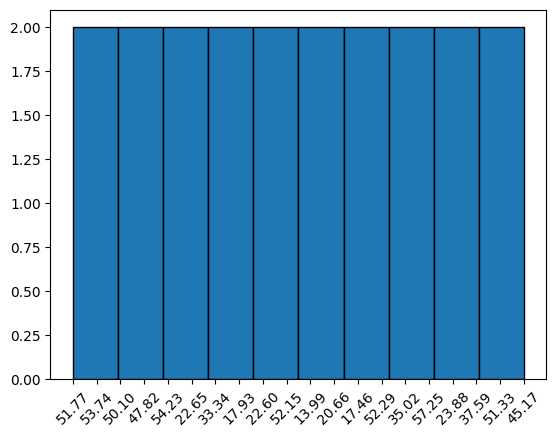

In [111]:
plt.hist(df['BookPrice'], bins=10, edgecolor='black')
plt.xticks(rotation=45)
plt.show()

# Laboratory Exercise - Bonus Task (+ 2 points)

As an additional task, you will need to click on each book listed on the page, proceed to the individual page for each book, and extract the quantity of available copies. Subsequently, you are required to compute both the mean and standard deviation of the quantities of these books.

## Hints
- To click on a specific `element` on a web page use `element.click()`.
- To navigate back to the previous page use `browser.back()`.

## Solution

In [159]:
browser.get('https://books.toscrape.com')

In [158]:
browser = webdriver.Chrome(options=options)

In [161]:
import numpy as np
quantities = []
book_links = browser.find_elements(By.CSS_SELECTOR, 'h3 a')
for link in book_links:
    book_url = link.get_attribute('href')
  
    link.click()
    quantity_element = browser.find_element(By.CLASS_NAME, 'instock')  
    quantity_text = quantity_element.text  #'In stock (22 available)'
    quantity = int(quantity_text.split('(')[1].split()[0])
    quantities.append(quantity)
    browser.back()
    
mean_quantity = np.mean(quantities)
std_dev_quantity = np.std(quantities)

print(f"Mean Quantity: {mean_quantity}")
print(f"Standard Deviation of Quantity: {std_dev_quantity}")
print(quantities)

Mean Quantity: 19.35
Standard Deviation of Quantity: 0.7262919523166975
[22, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19]
